# Voting and Polling History

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-setup" data-toc-modified-id="Python-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python setup</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Historical-plots" data-toc-modified-id="Historical-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Historical plots</a></span><ul class="toc-item"><li><span><a href="#Minor-parties" data-toc-modified-id="Minor-parties-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Minor parties</a></span></li><li><span><a href="#Mainstream-parties" data-toc-modified-id="Mainstream-parties-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Mainstream parties</a></span></li><li><span><a href="#Election-cycles" data-toc-modified-id="Election-cycles-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Election cycles</a></span></li></ul></li><li><span><a href="#Polling-history" data-toc-modified-id="Polling-history-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Polling history</a></span></li></ul></div>

## Python setup

In [1]:
# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# system imports
from io import StringIO
import pathlib

# local imports
import common
from common import COLOR_COALITION, COLOR_LABOR

In [2]:
# plotting stuff
plt.style.use('./markgraph.mplstyle')

## Data

In [3]:
data = """
Year    Date         ALP     LP      LNP  NP      CLP  DLP  DEM     GRN     ON   Others GovernmentBefore GovernmentAfter Labor2pp
1946    28-Sep-1946  49.7    33.0    -    10.7    -    -    -       -       -    6.6    Labor            Labor           54.1
1949    10-Dec-1949  46.0    39.3    -    10.8    -    -    -       -       -    3.9    Labor            Coalition       49.0
1951    28-Apr-1951  47.7    40.5    -    9.7     -    -    -       -       -    2.1    Coalition        Coalition       49.3
1954    29-May-1954  50.1    38.5    -    8.5     -    -    -       -       -    2.9    Coalition        Coalition       50.7
1955    10-Dec-1955  44.7    39.7    -    7.9     -    5.1  -       -       -    2.6    Coalition        Coalition       45.8
1958    22-Nov-1958  42.9    37.1    -    9.3     -    9.4  -       -       -    1.3    Coalition        Coalition       45.9
1961    09-Dec-1961  48.0    33.5    -    8.5     -    8.7  -       -       -    1.4    Coalition        Coalition       50.5
1963    30-Nov-1963  45.5    37.1    -    8.9     -    7.4  -       -       -    1.0    Coalition        Coalition       47.4
1966    26-Nov-1966  40.0    40.1    -    9.8     -    7.3  -       -       -    2.7    Coalition        Coalition       43.1
1969    25-Oct-1969  47.0    34.8    -    8.6     -    6.0  -       -       -    3.7    Coalition        Coalition       50.2
1972    02-Dec-1972  49.6    32.0    -    9.4     -    5.2  -       -       -    3.7    Coalition        Labor           52.7
1974    18-May-1974  49.3    34.9    -    10.8    -    1.4  -       -       -    3.5    Labor            Labor           51.7
1975    13-Dec-1975  42.8    41.8    -    11.0    0.2  1.3  -       -       -    2.8    Labor            Coalition       44.3
1977    10-Dec-1977  39.6    38.1    -    9.8     0.2  1.4  9.4     -       -    1.4    Coalition        Coalition       45.4
1980    18-Oct-1980  45.1    37.4    -    8.6     0.2  0.3  6.6     -       -    1.7    Coalition        Coalition       49.6
1983    05-Mar-1983  49.5    34.4    -    9.0     0.2  0.2  5.0     -       -    1.7    Coalition        Labor           53.2
1984    01-Dec-1984  47.5    34.1    -    10.6    0.3  0.6  5.4     -       -    1.4    Labor            Labor           51.8
1987    11-Jul-1987  45.8    34.3    -    11.5    0.2  -    6.0     -       -    2.0    Labor            Labor           50.8
1990    24-Mar-1990  39.4    34.8    -    8.4     0.3  -    11.3    1.4     -    4.4    Labor            Labor           49.9
1993    13-Mar-1993  44.9    36.8    -    7.2     0.3  -    3.8     1.9     -    5.2    Labor            Labor           51.4
1996    02-Mar-1996  38.8    38.7    -    8.2     0.4  -    6.8     2.9     -    4.3    Labor            Coalition       46.4
1998    03-Oct-1998  40.1    33.9    -    5.3     0.3  -    5.1     2.6     8.4  4.2    Coalition        Coalition       51.0
2001    10-Nov-2001  37.8    37.1    -    5.6     0.3  -    5.4     5.0     4.3  4.4    Coalition        Coalition       49.0
2004    09-Oct-2004  37.6    40.5    -    5.9     0.3  -    1.2     7.2     1.2  6.0    Coalition        Coalition       47.3
2007    24-Nov-2007  43.4    36.3    -    5.5     0.3  -    0.7     7.8     0.3  5.8    Coalition        Labor           52.7
2010    21-Aug-2010  38.0    30.5    9.1  3.7     0.3  -    0.2     11.8    0.2  6.2    Labor            Labor           50.1
2013    07-Sep-2013  33.4    32.0    8.9  4.3     0.3  0.3  -       8.6     0.2  11.9   Labor            Coalition       46.5
2016    02-Jul-2016  34.7    28.7    8.5  4.6     0.2  -    -       10.2    1.3  11.7   Coalition        Coalition       49.6
2019    18-May-2019  33.34   27.99   8.67 4.51    0.27 -    -       10.40   3.08 11.74  Coalition        Coalition       48.5
"""
# https://en.wikipedia.org/wiki/Two-party-preferred_vote
# https://www.aph.gov.au/About_Parliament/Parliamentary_Departments/Parliamentary_Library/pubs/rp/rp1617/FederalElectionResults


In [4]:
table = pd.read_csv(StringIO(data), header=0, index_col=0, 
                    skipinitialspace=True, sep=' ', na_values='-',
                    parse_dates=['Date'])
table

,Date,ALP,LP,LNP,NP,CLP,DLP,DEM,GRN,ON,Others,GovernmentBefore,GovernmentAfter,Labor2pp
Year,,,,,,,,,,,,,,
1946,1946-09-28,49.70,33.00,NaN,10.70,NaN,NaN,NaN,NaN,NaN,6.60,Labor,Labor,54.1
1949,1949-12-10,46.00,39.30,NaN,10.80,NaN,NaN,NaN,NaN,NaN,3.90,Labor,Coalition,49.0
1951,1951-04-28,47.70,40.50,NaN,9.70,NaN,NaN,NaN,NaN,NaN,2.10,Coalition,Coalition,49.3
1954,1954-05-29,50.10,38.50,NaN,8.50,NaN,NaN,NaN,NaN,NaN,2.90,Coalition,Coalition,50.7
1955,1955-12-10,44.70,39.70,NaN,7.90,NaN,5.1,NaN,NaN,NaN,2.60,Coalition,Coalition,45.8
1958,1958-11-22,42.90,37.10,NaN,9.30,NaN,9.4,NaN,NaN,NaN,1.30,Coalition,Coalition,45.9
1961,1961-12-09,48.00,33.50,NaN,8.50,NaN,8.7,NaN,NaN,NaN,1.40,Coalition,Coalition,50.5
1963,1963-11-30,45.50,37.10,NaN,8.90,NaN,7.4,NaN,NaN,NaN,1.00,Coalition,Coalition,47.4
1966,1966-11-26,40.00,40.10,NaN,9.80,NaN,7.3,NaN,NaN,NaN,2.70,Coalition,Coalition,43.1


In [5]:
coalition = ['LP', 'LNP', 'NP', 'CLP']
others = ['DLP', 'DEM', 'GRN', 'ON', 'Others']
primary = ['ALP', 'LP', 'LNP', 'NP', 'CLP', 'DLP', 'DEM', 'GRN', 'ON', 'Others']

In [6]:
# quick data consistency checks
assert(table.index.is_monotonic_increasing)
row_sums = table[primary].sum(axis=1, skipna=True)
assert((row_sums >= 99.8).all() and (row_sums <= 100.2).all())
assert((table['ALP'] < table['Labor2pp']).all())
assert(len(table['GovernmentBefore'].unique()) == 2)
assert(len(table['GovernmentAfter'].unique()) == 2)
assert((table['Date'].dt.year == table.index).all())

## Historical plots

### Minor parties

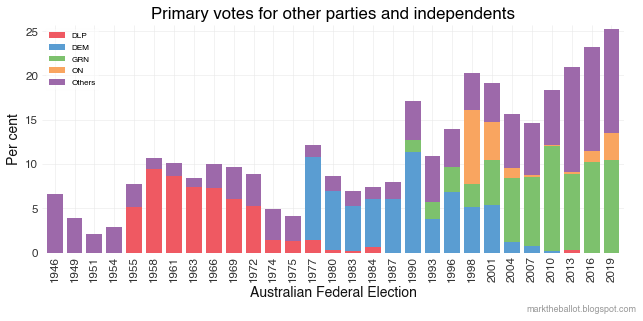

In [7]:
fig, ax = common.initiate_plot()
table[others].plot.bar(stacked=True, ax=ax, width=0.8)
common.plot_finalise(ax, title='Primary votes for other parties and independents', 
              xlabel="Australian Federal Election", ylabel='Per cent', lfooter=None)

### Mainstream parties

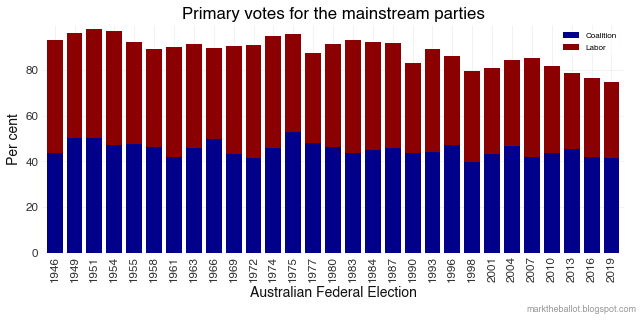

In [8]:
mainstream = table.copy()
mainstream['Coalition'] = mainstream[coalition].sum(axis=1)
mainstream = mainstream.rename(columns={'ALP': 'Labor'})
majors = ['Coalition', 'Labor']
fig, ax = common.initiate_plot()
mainstream[majors].plot.bar(stacked=True, ax=ax, width=0.8, 
                       color=[COLOR_COALITION, COLOR_LABOR])
common.plot_finalise(ax, title='Primary votes for the mainstream parties', 
              xlabel="Australian Federal Election", ylabel='Per cent', lfooter=None)

### Election cycles

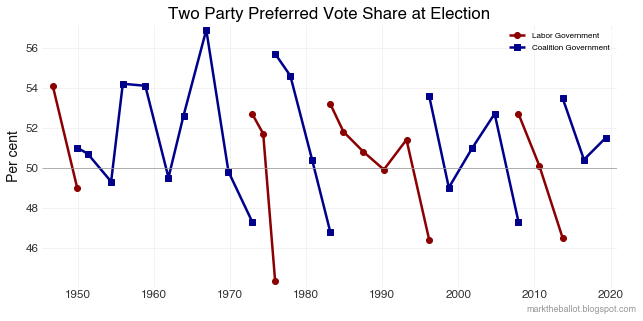

In [9]:
# identify changes of government at an election ...
changes = table['GovernmentBefore'] != table['GovernmentAfter']
change_points = changes[changes].index.values
final = table.index[-1]
if final not in change_points:
    change_points = np.append(change_points, table.index[-1])

# construct separate runs for each multi-term government
MARKER_LABOR, MARKER_COALITION = 'o', 's'
cycles = pd.DataFrame(index=table.Date)
colors = {}
markers = {}
start = table.index[0]
for i, ending in enumerate(change_points):
    name = f'{start}-{ending}'
    selection = table.index[(table.index >= start) 
                            & (table.index <= ending)]
    dates = table.loc[selection].Date
    values = table.loc[selection].Labor2pp
    if table.loc[start, 'GovernmentAfter'] == "Coalition":
        values = 100 - values
        colors[name] = COLOR_COALITION
        markers[name] = MARKER_COALITION
    else:
        colors[name] = COLOR_LABOR
        markers[name] = MARKER_LABOR
    values.index = dates
    cycles[name] = values
    start = ending

# plot
LW = 2.5
fig, ax = common.initiate_plot()
for column in cycles.columns:
    cycles[column].plot.line(ax=ax, marker=markers[column], 
                             c=colors[column], linewidth=LW)

# reference line
ax.axhline(y=50, color='#999999', linestyle='-', linewidth=0.75)

# custom legend
custom_lines = [
    Line2D([0], [0], color=COLOR_LABOR, lw=LW, marker=MARKER_LABOR),
    Line2D([0], [0], color=COLOR_COALITION, lw=LW, marker=MARKER_COALITION)
]
ax.legend(custom_lines, ['Labor Government', 'Coalition Government'])

# fix xlabels, so they are not rotated and not right aligned
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_ha('center')

# finalise plot
common.plot_finalise(ax, xlabel=None, ylabel='Per cent', lfooter=None,
                     title='Two Party Preferred Vote Share at Election',
                     concise_dates=True)

## Polling history

In [10]:
# Historical data from Ethan at https://armariuminterreta.com/
# Load historical polling data ...
historical = pd.read_excel('../historical-data/Australian Federal Polling Database.xlsx',)
len(historical)

3252

In [11]:
# quick peak at the data (if needed)
if False:
    display(historical.head())
    print(historical.dtypes)

In [12]:
# Get election dates
# We will focus on polls in the last N Weeks of the campaign
FOCUS = 5 # WEEKS
FOCUS_DAYS = FOCUS * 7 # DAYS
elections = table[['Date', 'Labor2pp']].copy()
elections['Coalition2pp'] = 100.0 - elections['Labor2pp']
len(elections)

29

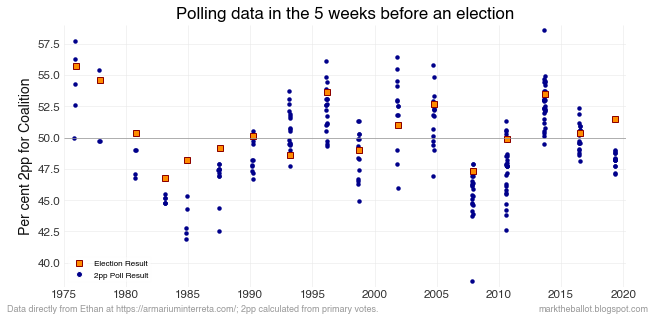

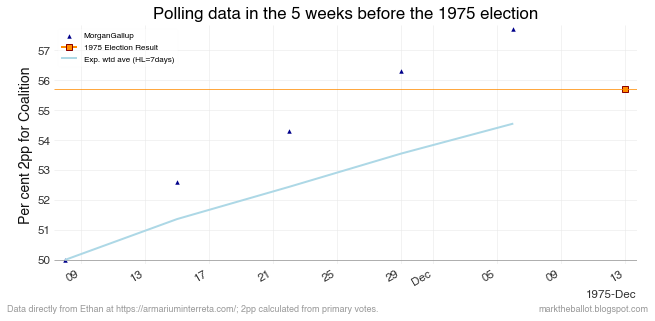

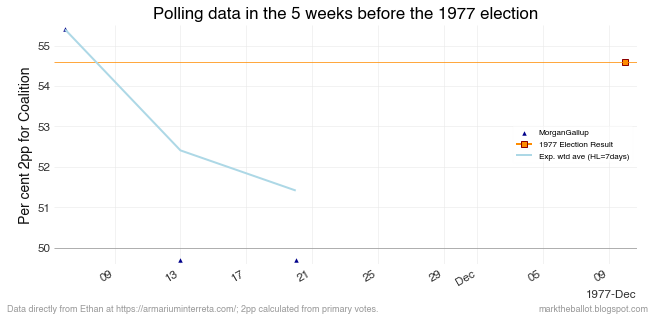

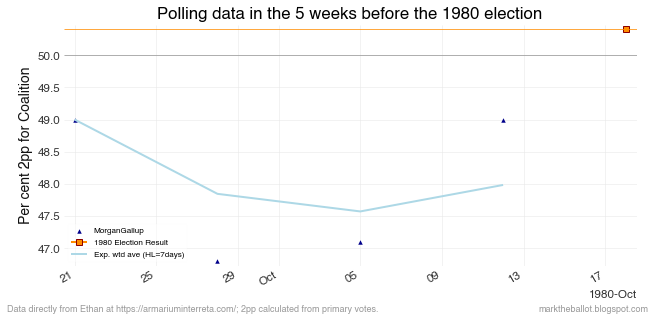

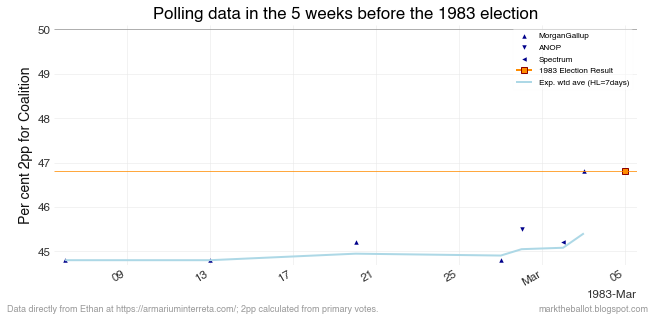

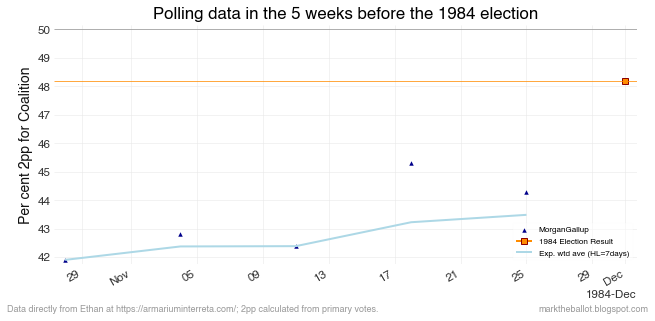

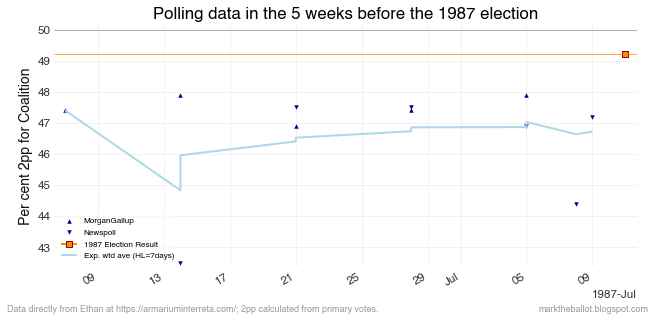

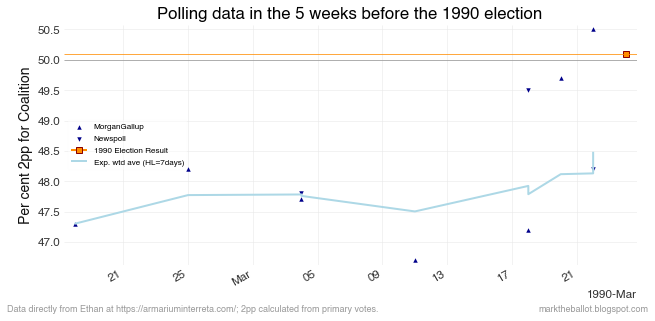

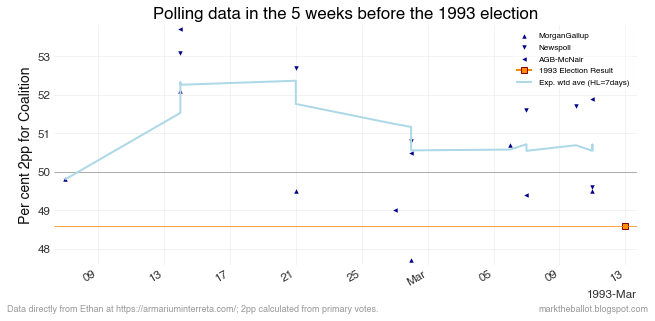

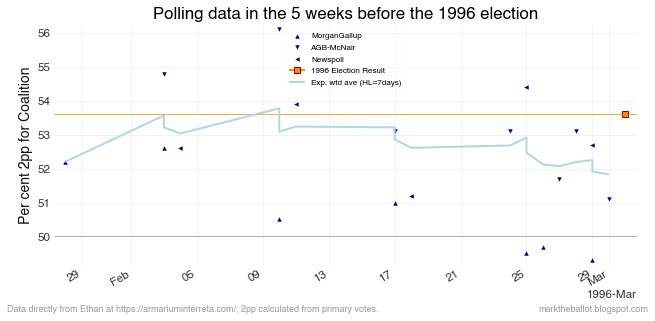

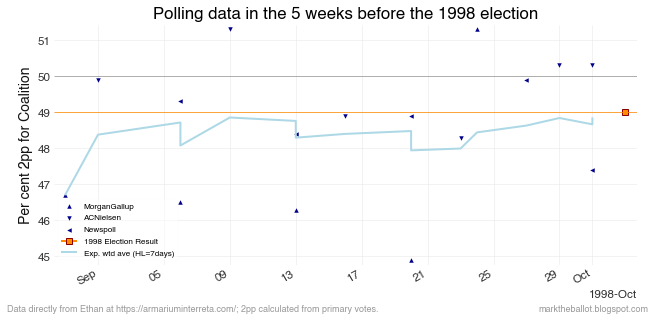

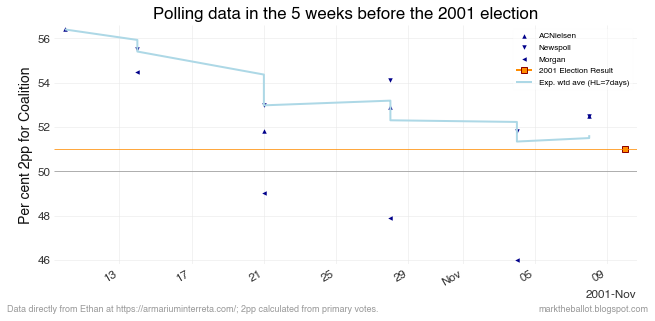

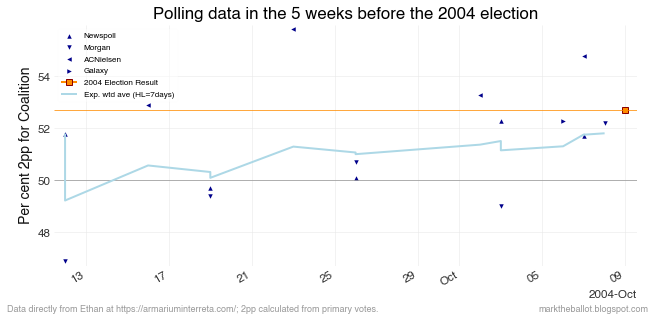

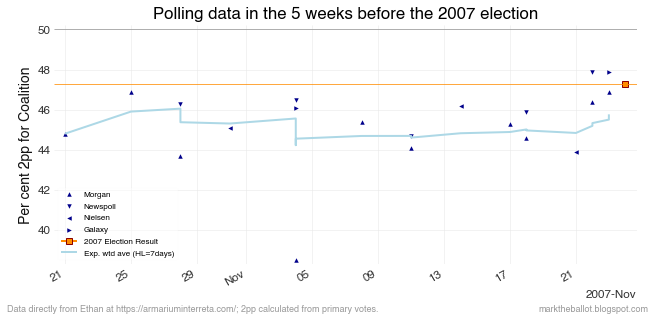

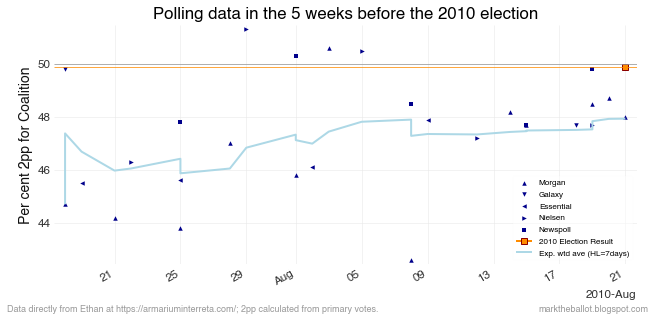

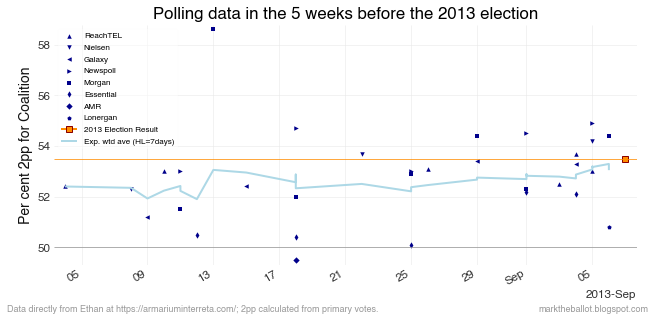

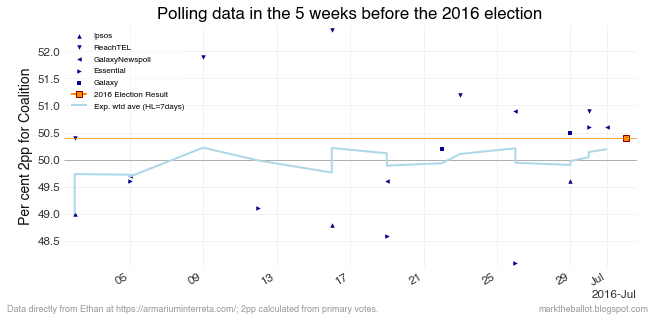

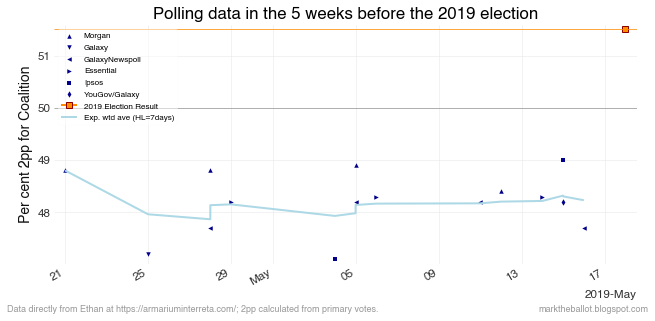

In [26]:
# plot the poll data prior to an election
COALITION_TPP = 'Est2pp'
ELECTION_MARKER = 's'
POLL_MARKER = 'o'
ELECTION_COLOR = 'darkorange'
data_statement = (
    'Data directly from Ethan at https://armariuminterreta.com/; '
    '2pp calculated from primary votes.'
)
HALF_LIFE = 7 # days

# --- the summary chart
fig, ax = common.initiate_plot()
for e in elections.Date:
    # ignore early polls
    if e < pd.Timestamp('1975-01-01'):
        continue
    
    # get polling data
    election = e
    election_2pp = elections.loc[elections.Date == e, 'Coalition2pp'].values[0]
    start = e - pd.Timedelta(days=FOCUS_DAYS)
    selected = historical[(historical.StartDate >= start)
                          & (historical.EndDate <= election)].copy()

    # --- add to the summary plot
    # polling
    selected.plot(kind='scatter', x='EndDate', y=COALITION_TPP, ax=ax, 
                  c=COLOR_COALITION, marker=POLL_MARKER)
    
    # lection
    ax.plot([election], [election_2pp],
            c=ELECTION_COLOR, markeredgecolor='darkred', marker=ELECTION_MARKER)
    
    # --- also do a plot just for this election
    _, ax1 = common.initiate_plot()
    markers = '^v<>sdDph'
    for i, pollster in enumerate(selected.Pollster.unique()):
        # poll data
        p_data = selected[selected.Pollster == pollster]
        p_data.plot(kind='scatter', x='EndDate', y=COALITION_TPP, ax=ax1, 
                      c=COLOR_COALITION, label=pollster, marker=markers[i])
    
    ax1.plot([election], [election_2pp],
             c=ELECTION_COLOR, markeredgecolor='darkred', marker=ELECTION_MARKER,
             label=f'{election.year} Election Result')
    ax1.axhline(y=50, color='#999999', linestyle='-', linewidth=0.75)
    ax1.axhline(y=election_2pp, color=ELECTION_COLOR, linestyle='-', linewidth=0.75,)
    
    ewm = selected[COALITION_TPP].ewm(halflife=HALF_LIFE).mean()
    ewm.index = selected['EndDate']
    ewm.plot(color='lightblue', ax=ax1, linewidth=2, 
             label=f'Exp. wtd ave (HL={HALF_LIFE}days)')
    
    ax1.legend(loc='best')
    common.plot_finalise(ax1, xlabel=None, ylabel='Per cent 2pp for Coalition', 
                         lfooter=data_statement,
                         title=f'Polling data in the {FOCUS} weeks '
                               f'before the {election.year} election',
                        close=False, concise_dates=True)

# --- summary plot
# legend
legend_body = [Line2D([0], [0], marker=ELECTION_MARKER, color='w', label='Election Result',
                          markerfacecolor=ELECTION_COLOR, markeredgecolor='darkred', ),
              Line2D([0], [0], marker=POLL_MARKER, color='w', label='2pp Poll Result',
                          markerfacecolor=COLOR_COALITION)]
ax.legend(handles=legend_body, loc='best')

# reference line
ax.axhline(y=50, color='#999999', linestyle='-', linewidth=0.75)

# finalise
common.plot_finalise(ax, xlabel=None, ylabel='Per cent 2pp for Coalition', 
                     lfooter= data_statement,
                     title=f'Polling data in the {FOCUS} weeks before an election',
                     concise_dates=True)